In [1]:
import pandas as pd
import numpy as np
import logging
import plotly.graph_objects as go
from itertools import product


import matplotlib.pyplot as plt


logger = logging.getLogger()
logging.basicConfig(level=logging.DEBUG)

In [2]:
df = pd.read_csv('correlated_data.csv')

In [3]:
df.head()

,X,Y
0,0.000000,-1.272994
1,1.851852,29.202382
2,3.703704,19.933030
3,5.555556,14.932924
4,7.407407,-5.532401


In [4]:
# predict y -> ax + b

In [4]:
n = len(df)  # the number of observations is directly the number of line in the dataframe
n

55

In [5]:
x = df['X']
y = df['Y']

# mean
y_mean = np.mean(y)
x_mean = np.mean(x)

In [6]:
a=np.sum((y-y_mean)*(x-x_mean))/np.sum((x-x_mean)**2)
a

np.float64(0.9690091520064417)

In [7]:
b=y_mean - a*x_mean
b

np.float64(0.616032346533963)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\micro\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\micro\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: 

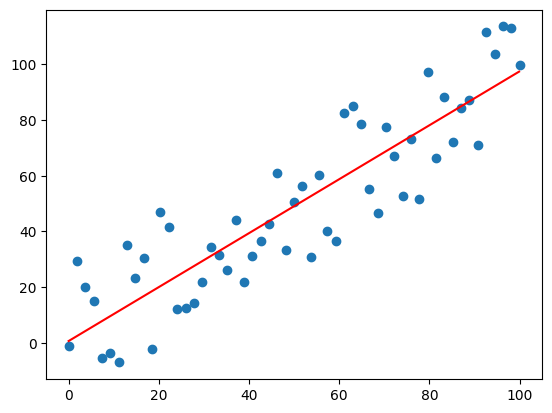

In [8]:
plt.scatter(x, y)


x_new = np.arange(0, 100, 0.1)
y_new = a*x_new+b

plt.plot(x_new, y_new, color='r')
plt.show()

In [9]:
y_pred = a*x+b
MSE = np.sum((y-y_pred)**2)/(n-2)
RMSE = np.sqrt(MSE)
print(f'MSE is equal to: {MSE:.3f}')
print(f'RMSE is equal to: {RMSE:.2f}')

MSE is equal to: 225.498
RMSE is equal to: 15.02


In [10]:
MAE = np.mean(np.abs(y-y_pred))
print(f'MAE is equal to: {MAE:.2f}')

MAE is equal to: 12.72


In [11]:
SSR = np.sum((y_pred - y_mean)**2)

In [12]:
SSE = np.sum((y - y_pred)**2)

In [13]:
SSTO = np.sum((y - y_mean)**2)

In [14]:
SSTO

np.float64(56581.869701440526)

In [15]:
SSR+SSE

np.float64(56581.86970144053)

In [16]:
assert np.isclose(SSTO, SSR+SSE)  # we can not assert directly the two sides are equal, because of python representation of float number (limited precision)
# for more information on this issue https://peps.python.org/pep-0485/#rationale

In [17]:
r_squared = SSR/SSTO
print(f'R² is equal to: {r_squared}')

R² is equal to: 0.7887768829951058


In [18]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred)

0.7887768829951057

In [19]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y, y_pred=y_pred)

12.720421007778096

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y, y_pred=y_pred) # this is normal it is different from the one we computed, the formula is not exactly the same on the denominator

217.2981615327828

# Gradient Descent

### Find the best fitted line using gradient descent

In [22]:
# your turn to fill this :)

In [21]:
# Fill this simple linear regression function
def f(a,b,x): # fonction
    """
    a: coef directeur
    b: constante
    x : array
    """
    return a*x+b

def mse(a, b, x, y):
  return np.sum(np.square(y - (a*x+b)))/len(x)

In [25]:
def mse_db(y_data, x_data, a, b):
    """Derivee de la MSE par rapport a b."""
    n = len(x_data)
    # grad_b = 2/n * sum((ax_i + b) - y_i)
    return (2 / n) *np.sum((a * x_data + b) - y_data)


def mse_da(y_data, x_data, a, b):  # ok
    """Derivee de la MSE par rapport a a."""
    n = len(x_data)
    # grad_a = 2/n * sum(x_i * ((ax_i + b) - y_i))
    return (2 / n) *np.sum(x_data * ((a * x_data + b) - y_data))


def gradient_descent(point, n_iterations, x, y, alpha):
    """
    point : random point where you start the gradient descent
    n_iterations : number of iterations
    alpha : learning rate
    """
    i = 0
    a = [point[0]]
    b = [point[1]]
    while i != n_iterations:
        i += 1
        grad_a = mse_da(y, x, a[-1], b[-1])
        grad_b = mse_db(y, x, a[-1], b[-1])
        a.append(a[-1] - alpha * grad_a)
        b.append(b[-1] - alpha * grad_b)
    logger.warning('Stop after %s iterations', i)
    return a[-1], b[-1]

point_start = (0, 0)
a_g, b_g = gradient_descent(point_start, n_iterations=1e4, x=x, y=y, alpha=1e-4)

In [29]:
# Let's do the same thing but with a stop criterion
# And without storing all iterations in a list
def gradient_descent_stop_criterion(point,x,y,alpha, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b) # gradient of a
    grad_b = mse_db(y,x,a,b) # gradient of b
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        a = a - alpha * grad_a
        b = b - alpha * grad_b
        grad_a = mse_da(y, x, a, b)
        grad_b = mse_db(y, x, a, b)
    logger.warning('Stop after %s iterations', i)
    return a, b

point_start = (0, 0)
a_g_stop , b_g_stop = gradient_descent_stop_criterion(point=point_start,x=x,y=y,alpha=0.0001, stop_criterion=1e-3)

In [30]:
def gradient_descent_backtracking_line_search(point,x,y,alpha, beta, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        if mse(a - alpha * grad_a, b - alpha * grad_b,x, y) > mse(a, b,x, y):
            alpha *= beta  # Reduce the learning rate
            continue       # Skip the update below and try again with the new alpha
            
        # --- Update Logic (Only runs if the 'if' above was False) ---
        a = a - alpha * grad_a
        b = b - alpha * grad_b
        
        grad_a = mse_da(y, x, a, b)
        grad_b = mse_db(y, x, a, b)
    logger.warning('Stop after %s iterations', i)
    return a, b
a_g_bls, b_g_bls = gradient_descent_backtracking_line_search(point=(0,0),x=x,y=y,alpha=0.001, beta=0.8, stop_criterion=1e-3)

In [ ]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
grad = lambda x: a_g*x+b_g
plt.plot(x_test, grad(x_test),color="red")

grad_stop = lambda x: a_g_stop*x+b_g_stop
plt.plot(x_test, grad_stop(x_test),color="green")

grad_bls = lambda x: a_g_bls*x+b_g_bls
plt.plot(x_test, grad_bls(x_test),color="green")

test = lambda x: a*x+b
plt.plot(x_test, test(x_test),color="blue")
print("first method:")
print(f"y = {a:.4f}*x+{b:.4f}")
print("gradient method")
print(f"y = {a_g:.4f}*x+{b_g:.4f}")
print("gradient method with stop criterion")
print(f"y = {a_g_stop:.4f}*x+{b_g_stop:.4f}")
print("gradient method with stop criterion and backtracking line search")
print(f"y = {a_g_bls:.4f}*x+{b_g_bls:.4f}")
plt.show()

In [28]:
A, B = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10000, 10000, 100))

In [29]:
MSE = np.array([mse(a=a, b=b, x=x, y=y) for a, b in zip(A.ravel(), B.ravel())])
MSE = np.reshape(MSE, A.shape)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(A, B, MSE)
plt.show()